In [60]:
import numpy as np
import cv2
from skimage.transform import hough_line, hough_line_peaks
from matplotlib import cm

import matplotlib.pyplot as plt
from skimage.draw import line
# importing custom edge detection functions from source file
from source import rgb2gray,hysteresis
from source import Generte_Masks as get_filters

In [61]:
from scipy import signal
from scipy import misc
import scipy

from matplotlib.pyplot import imread
%matplotlib inline

### Loading Image

In [1]:
# choose from 2,4,6,8,9
Image=imread('images/5.jpeg')
# converting to rgb
plt.figure(figsize=(7,6))
plt.imshow(Image)
plt.title('coconut')
plt.show()
Image=rgb2gray(Image)

NameError: name 'imread' is not defined

### Applying vertical edge detection filter

In [296]:
#create filter
# There are two parameters that control the size of filter
# Normally (3x3) filter should be used (depends upon image resolution)
Gx,Gy=get_filters(sigma=1,T=0.2)
print(Gy.shape)
# Applying filter
fy = signal.convolve2d(Image, Gy, boundary='symm', mode='same')
fx = signal.convolve2d(Image, Gx, boundary='symm', mode='same')

(5, 5)


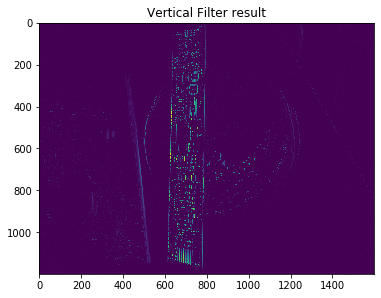

In [297]:
M=np.sqrt(fx**2+fy**2)/255
M=100*M/M.max()
Theta=np.zeros(Image.shape)
Theta=np.arctan2(fy,fx)
Theta=Theta*(180/np.pi)+180
# Selecting only edges close to vertical
M[ (Theta<80) | ((Theta>110) & (Theta<250)) | (Theta>290)] = 0
plt.figure(figsize=(6,5))
plt.imshow(M)
plt.title('Vertical Filter result')
plt.show()


### Applying Hysterisis

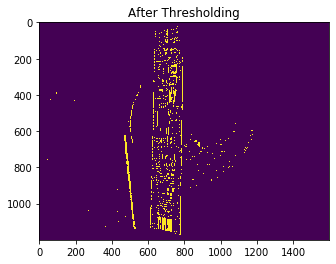

In [298]:
# There are two parameters lower threshold(TI) and upper threshold(TH)
Mh=hysteresis(M,TI=5,TH=22)
Mh[np.where(Mh<5)]=0
Mh[np.where(Mh>=5)]=1
Mh=Mh*255
Mha = Mh.astype('uint8')
plt.figure()
plt.title("After Thresholding")
plt.imshow(Mha)
plt.show()

### Applying hough transfrom

Text(0.5, 1.0, 'Detected lines')

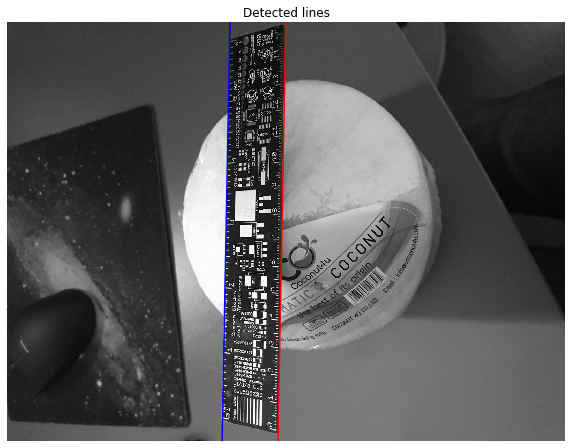

In [299]:
tested_angles = np.linspace(np.pi / 1.15, np.pi / 0.85, 10)
h, theta, d = hough_line(Mha, theta=tested_angles)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(Image, cmap=cm.gray)
origin = np.array((0, Mha.shape[1]))
for i,(_, angle, dist) in enumerate(zip(*hough_line_peaks(h, theta, d,min_distance=100))):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    if i==0:
        ax.plot(origin, (y0, y1), '-r')
        
    elif i==1:
        ax.plot(origin, (y0, y1), '-b')

ax.set_xlim(origin)
ax.set_ylim((Mh.shape[0], 0))
ax.set_axis_off()
ax.set_title('Detected lines')


### Getting distance between lines

In [300]:
h=hough_line_peaks(h, theta, d, min_distance=100)

In [276]:
len(h[2])

4

In [277]:
theta1,theta2=h[1][:2]
d1,d2=h[2][:2]

In [278]:
d1,d2,theta1,theta2

(-363.590897724431, -867.7169292323081, 3.374600804367553, 3.053210251570643)

In [279]:
b1 = d1/np.sin(theta1)
m1 = -(np.cos(theta1)/np.sin(theta1))
b2 = d2/np.sin(theta2)
m2 = -(np.cos(theta2)/np.sin(theta2))
y1=(400-b1)/m1
y2=(400-b2)/m2
print("*** Diameter of coconut is %0.2f pixels ***"%abs(y1-y2))

*** Diameter of coconut is 627.80 pixels ***


### Confirming Diameter in pixels

In [251]:
%matplotlib qt
plt.figure()
plt.imshow(Image)
print("Select 8 points")
pts=plt.ginput(n=2,timeout=0)
plt.show()
print("*** Original Diameter %0.2f pixels "%abs(pts[0][0]-pts[1][0]))
%matplotlib inline

Select 8 points
*** Original Diameter 323.77 pixels 
